# Installazioni ed import necessari

In [1]:
!pip install lxml yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 809 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 5.0 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=9ee18f2ee04b25e75689b6f9c753ec427abd0e5c5186960e515ae87d30e817c6
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import os, datetime
import pandas as pd
import yfinance as yf
import pandas_ta as ta

In [4]:
def get_categorical_tickers():
    '''
    This Function returns a dictionary of tickers for different industry types
    :return:
    ticker_dict: Dictionary of 9 different industry types with over 8 tickers each
    tickerSymbols: Set of three tickers
    '''
    ticker_dict = {}
    all_tickers = []
    ticker_dict['energy'] = ['XOM', 'CVX', 'SHEL', 'PTR', 'TTE', 'BP', 'PBR', 'SNP', 'SLB', 'VLO']
    ticker_dict['materials'] = ['BHP', 'LIN', 'RIO', 'DD', 'SHW', 'CTA-PB', 'APD']
    ticker_dict['industrials'] = ['UPS', 'HON', 'LMT', 'BA', 'GE', 'MMM', 'RTX', 'CAT', 'WM', 'ABB', 'ETN', 'EMR',
                                  'FDX', 'TRI']
    ticker_dict['utilities'] = ['NEE', 'DUK', 'NGG', 'AEP', 'XEL','AWK' ,'ETR', 'PCG']
    ticker_dict['healthcare'] = ['UNH', 'JNJ', 'PFE', 'NVO', 'TMO', 'MRK', 'AZN', 'NVS', 'DHR', 'AMGN', 'CVS', 'GSK',
                                 'ZTS', 'GILD']
    ticker_dict['financials'] = ['BRK-A', 'V', 'JPM', 'BAC', 'MA', 'WFC', 'C-PJ', 'MS', 'RY', 'AXP']
    ticker_dict['discretionary'] = ['AMZN', 'TSLA', 'HD', 'BABA', 'TM', 'NKE', 'MCD', 'SBUX', 'F', 'MAR', 'GM', 'ORLY',
                                     'HMC', 'CMG', 'HLT'] # tolgo 'LILI'
    ticker_dict['staples'] = ['WMT', 'PG', 'KO', 'COST', 'PEP', 'BUD', 'UL', 'TGT', 'MDLZ', 'CL', 'DG', 'KHC', 'KDP',
                              'HSY']
    ticker_dict['IT'] = ['AAPL', 'MSFT', 'TSM', 'NVDA', 'AVGO', 'CSCO', 'ORCL', 'ACN', 'ADBE', 'INTC', 'CRM', 'TXN',
                         'QCOM', 'AMD', 'IBM', 'SONY', 'AMAT', 'INFY', 'ADI', 'MU', 'LRCX']
    ticker_dict['communication'] = ['GOOG', 'DIS', 'VZ', 'CMCSA', 'TMUS', 'T', 'NFLX', 'SNAP', 'VOD',
                                    'TWTR', 'EA'] # rimuovo FB, BAIDU
    ticker_dict['estate'] = ['PLD', 'AMT', 'CCI', 'EQIX', 'SPG', 'DLR', 'WELL', 'EQR', 'AVB', 'WY', 'INVH', 'MAA']
    ticker_keys = []
    for key in ticker_dict.keys():
        ticker_keys.append(key)
        all_tickers.append(ticker_dict[key])
    ticker_dict['all'] = all_tickers
    tickerSymbols = ['BRK-A', 'GOOG', 'MSFT']
    return ticker_dict, tickerSymbols

def get_company_names():
    '''
    Get a dictionary of search strings corresponding to different ticker labels
    :return:
    ticker_dict: Dictionary of search strings given a stock ticker
    '''
    ticker_dict = {}
    all_tickers = []
    ticker_dict['energy'] = {'XOM': 'Exxon Mobil', 'CVX': 'Chevron', 'SHEL': 'Shell', 'PTR': 'PetroChina',
                             'TTE': 'TotalEnergies', 'BP': 'BP', 'PBR': 'Petroleo Brasileiro',
                             'SNP': 'China Petroleum', 'SLB': 'Schlumberger', 'VLO': 'Valero'}
    '''
    ticker_dict['materials'] = ['BHP', 'LIN', 'RIO', 'DD', 'SHW', 'CTA-PB', 'APD']
    ticker_dict['industrials'] = ['UPS', 'HON', 'LMT', 'BA', 'GE', 'MMM', 'RTX', 'CAT', 'WM', 'ABB', 'ETN', 'EMR',
                                  'FDX', 'TRI']
    ticker_dict['utilities'] = ['NEE', 'DUK', 'NGG', 'AEP', 'XEL','AWK' ,'ETR', 'PCG']
    ticker_dict['healthcare'] = ['UNH', 'JNJ', 'PFE', 'NVO', 'TMO', 'MRK', 'AZN', 'NVS', 'DHR', 'AMGN', 'CVS', 'GSK',
                                 'ZTS', 'GILD']
    ticker_dict['financials'] = ['BRK-A', 'V', 'JPM', 'BAC', 'MA', 'WFC', 'C-PJ', 'MS', 'RY', 'AXP']
    ticker_dict['discretionary'] = ['AMZN', 'TSLA', 'HD', 'BABA', 'TM', 'NKE', 'MCD', 'SBUX', 'F', 'MAR', 'GM', 'ORLY',
                                    'LILI', 'HMC', 'CMG', 'HLT']
    ticker_dict['staples'] = ['WMT', 'PG', 'KO', 'COST', 'PEP', 'BUD', 'UL', 'TGT', 'MDLZ', 'CL', 'DG', 'KHC', 'KDP',
                              'HSY']
    ticker_dict['IT'] = ['AAPL', 'MSFT', 'TSM', 'NVDA', 'AVGO', 'CSCO', 'ORCL', 'ACN', 'ADBE', 'INTC', 'CRM', 'TXN',
                         'QCOM', 'AMD', 'IBM', 'SONY', 'AMAT', 'INFY', 'ADI', 'MU', 'LRCX']
    ticker_dict['communication'] = ['GOOG', 'FB', 'DIS', 'VZ', 'CMCSA', 'TMUS', 'T', 'NFLX', 'SNAP', 'VOD', 'BAIDU',
                                    'TWTR', 'EA']
    ticker_dict['estate'] = ['PLD', 'AMT', 'CCI', 'EQIX', 'SPG', 'DLR', 'WELL', 'EQR', 'AVB', 'WY', 'INVH', 'MAA']
    ticker_keys = []
    for key in ticker_dict.keys():
        ticker_keys.append(key)
        all_tickers.append(ticker_dict[key])
    ticker_dict['all'] = all_tickers
    '''
    return ticker_dict

def cross_corr(a,b):
    '''
    Compute the cross-correlation between
    :param a: Time-series data of first stock
    :param b: Time-series data of second stock
    :return: Cross-correlation of the two stocks that are input
    '''
    return (a*b).sum()/((a**2).sum()*(b**2).sum())**0.5

def get_tick_values(tickerSymbol, start, end):
    '''
    Function to extract the time series data
    :param tickerSymbol: String of stock ticker
    :param start: String of starting date of the time-series data
    :param end: String of ending date of the time-series data
    :return: type(list): Time series data
    '''
    tickerData = yf.Ticker(tickerSymbol)
    tickerDf = yf.download(tickerSymbol, start=start, end=end)
    tickerDf = tickerDf['Adj Close']
    data = tickerDf
    return data.values

def get_control_vector(val):
    '''
    Returns the mask of day instances where stock purchase/sell decisions are to be made
    :param val: Input array of stock values
    :return: np.array of decisions maks labels (-2/0/2)
    '''
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    '''
    Returns the growth of investment over time as function of the input decision mask and the stock values
    :param val: np.array of the actual stock value over time
    :param controls: np.array of the control mask to make purchase/sell decisions
    :return: np.array of percentage growth value of the invested stock
    '''
    inv = []
    curr_val = 100
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv



In [5]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

# Import Dati

In [6]:
# iperparametri
batch_size = 32
seq_len = 8

d_k = 256
d_v = 256
n_heads = 12
ff_dim = 256

In [7]:
start = '2010-01-01'
end = '2022-01-01'

stock_list = ['^GSPC', '^FTSE', '^GDAXI', '^NSEI']
stock = stock_list[0]

In [8]:
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [9]:
df = df.reset_index().copy()

In [10]:
df.drop(columns='Adj Close', inplace=True)

In [11]:
# Apply moving average with a window of 10 days to all columns
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].rolling(10).mean() 

# Drop all rows with NaN values
df.dropna(how='any', axis=0, inplace=True) 
df.head()

,Date,Open,High,Low,Close,Volume
9,2010-01-15,1138.220020,1143.767004,1132.987012,1140.668994,4.293158e+09
10,2010-01-19,1140.167017,1145.425000,1134.908008,1142.392993,4.366501e+09
11,2010-01-20,1141.696008,1146.556995,1134.867004,1142.544995,4.598455e+09
12,2010-01-21,1141.993018,1146.795996,1132.956006,1140.478992,4.788618e+09
13,2010-01-22,1139.915015,1144.098999,1128.842017,1135.485999,4.882415e+09


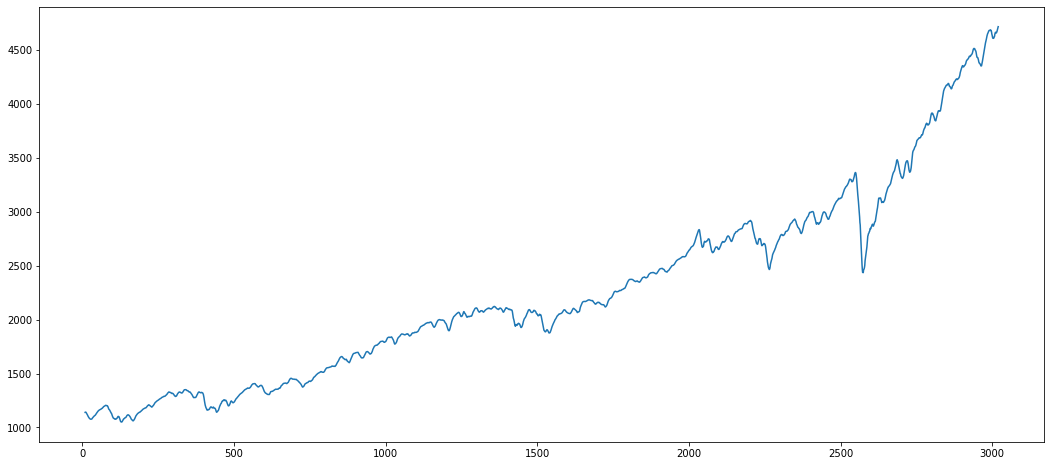

In [12]:
plt.figure(figsize=(18,8))
plt.plot(df.Close)

In [13]:
df.shape

(3012, 6)

In [14]:
# calcolo percentuali di cambio
df['Open'] = df['Open'].pct_change()
df['High'] = df['High'].pct_change() # Create arithmetic returns column
df['Low'] = df['Low'].pct_change() # Create arithmetic returns column
df['Close'] = df['Close'].pct_change() # Create arithmetic returns column
df['Volume'] = df['Volume'].pct_change()

df.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values

In [15]:
df.shape

(3011, 6)

In [16]:
times = sorted(df.index.values)
last_10pct = sorted(df.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(df.index.values)[-int(0.2*len(times))] # Last 20% of series

In [17]:
last_10pct, last_20pct

(2720, 2419)

In [18]:
# normalizzazione prezzo colonne
min_return = min(df[(df.index < last_20pct)][['Open', 'High', 'Low', 'Close']].min(axis=0))
max_return = max(df[(df.index < last_20pct)][['Open', 'High', 'Low', 'Close']].max(axis=0))

# min-max normalization
df['Open'] = (df['Open'] - min_return) / (max_return - min_return)
df['High'] = (df['High'] - min_return) / (max_return - min_return)
df['Low'] = (df['Low'] - min_return) / (max_return - min_return)
df['Close'] = (df['Close'] - min_return) / (max_return - min_return)

In [19]:
# normalizzazione volume
min_volume = df[(df.index < last_20pct)]['Volume'].min(axis=0)
max_volume = df[(df.index < last_20pct)]['Volume'].max(axis=0)

# Min-max normalize volume columns (0-1 range)
df['Volume'] = (df['Volume'] - min_volume) / (max_volume - min_volume)

In [20]:
# creazione train, val e tes set
df_train = df[(df.index < last_20pct)]  # Training data are 80% of total data
df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)]
df_test = df[(df.index >= last_10pct)]

# Remove date column
df_train.drop(columns=['Date'], inplace=True)
df_val.drop(columns=['Date'], inplace=True)
df_test.drop(columns=['Date'], inplace=True)


# Convert pandas columns into arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

df_train.head()

Training data shape: (2409, 5)
Validation data shape: (301, 5)
Test data shape: (301, 5)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Open,High,Low,Close,Volume
10,0.705767,0.696560,0.705236,0.698740,0.566603
11,0.692730,0.680285,0.644145,0.650114,0.687799
12,0.654598,0.652774,0.586014,0.581627,0.648224
13,0.581225,0.562452,0.517315,0.490969,0.575024
14,0.496494,0.514615,0.508472,0.495665,0.515473


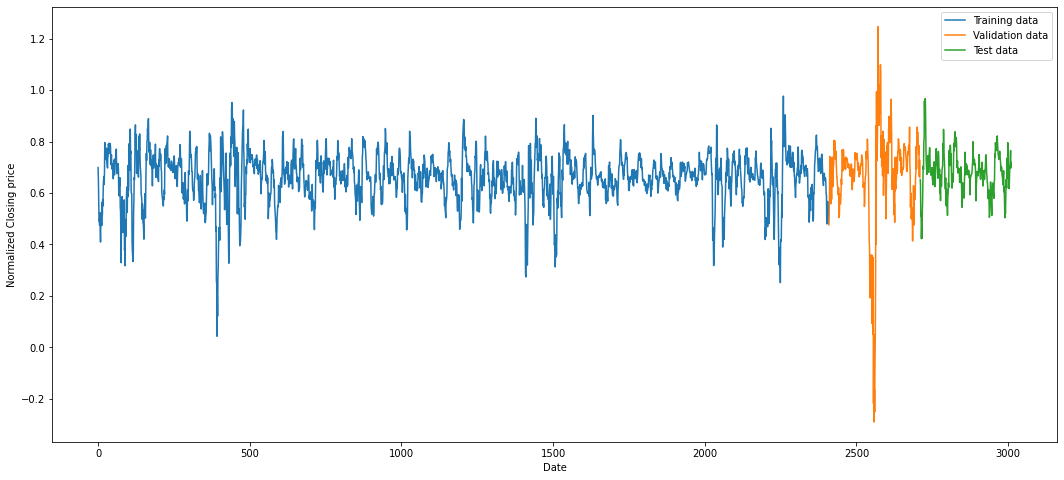

In [21]:
plt.figure(figsize=(18,8))
plt.plot(np.arange(train_data.shape[0]), df_train['Close'], label='Training data')
plt.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['Close'], label='Validation data')
plt.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Close'], label='Test data')
plt.xlabel('Date')
plt.ylabel('Normalized Closing price')
plt.legend()

In [22]:
# Training data
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
  y_train.append(train_data[:, 3][i]) #Value of 4th column (Close Price) of df-row 128+1
X_train, y_train = np.array(X_train), np.array(y_train)

###############################################################################

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 3][i])
X_val, y_val = np.array(X_val), np.array(y_val)

###############################################################################

# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 3][i])    
X_test, y_test = np.array(X_test), np.array(y_test)

print('Training set shape', X_train.shape, y_train.shape)
print('Validation set shape', X_val.shape, y_val.shape)
print('Testing set shape' ,X_test.shape, y_test.shape)

Training set shape (2401, 8, 5) (2401,)
Validation set shape (293, 8, 5) (293,)
Testing set shape (293, 8, 5) (293,)


# Modello

In [23]:
class Time2Vector(Layer):
  def __init__(self, seq_len, **kwargs):
    super(Time2Vector, self).__init__()
    self.seq_len = seq_len

  def build(self, input_shape):
    '''Initialize weights and biases with shape (batch, seq_len)'''
    self.weights_linear = self.add_weight(name='weight_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.bias_linear = self.add_weight(name='bias_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.weights_periodic = self.add_weight(name='weight_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.bias_periodic = self.add_weight(name='bias_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

  def call(self, x):
    '''Calculate linear and periodic time features'''
    x = tf.math.reduce_mean(x[:,:,:4], axis=-1) 
    time_linear = self.weights_linear * x + self.bias_linear # Linear time feature
    time_linear = tf.expand_dims(time_linear, axis=-1) # Add dimension (batch, seq_len, 1)
    
    time_periodic = tf.math.sin(tf.multiply(x, self.weights_periodic) + self.bias_periodic)
    time_periodic = tf.expand_dims(time_periodic, axis=-1) # Add dimension (batch, seq_len, 1)
    return tf.concat([time_linear, time_periodic], axis=-1) # shape = (batch, seq_len, 2)
   
  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'seq_len': self.seq_len})
    return config

In [24]:
class SingleAttention(Layer):
  def __init__(self, d_k, d_v):
    super(SingleAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v

  def build(self, input_shape):
    self.query = Dense(self.d_k, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')
    
    self.key = Dense(self.d_k, 
                     input_shape=input_shape, 
                     kernel_initializer='glorot_uniform', 
                     bias_initializer='glorot_uniform')
    
    self.value = Dense(self.d_v, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    q = self.query(inputs[0])
    k = self.key(inputs[1])

    attn_weights = tf.matmul(q, k, transpose_b=True)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)
    
    v = self.value(inputs[2])
    attn_out = tf.matmul(attn_weights, v)
    return attn_out    

#############################################################################

class MultiAttention(Layer):
  def __init__(self, d_k, d_v, n_heads):
    super(MultiAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.attn_heads = list()

  def build(self, input_shape):
    for n in range(self.n_heads):
      self.attn_heads.append(SingleAttention(self.d_k, self.d_v))  
    
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1]=7 
    self.linear = Dense(input_shape[0][-1], 
                        input_shape=input_shape, 
                        kernel_initializer='glorot_uniform', 
                        bias_initializer='glorot_uniform')

  def call(self, inputs):
    attn = [self.attn_heads[i](inputs) for i in range(self.n_heads)]
    concat_attn = tf.concat(attn, axis=-1)
    multi_linear = self.linear(concat_attn)
    return multi_linear   

#############################################################################

class TransformerEncoder(Layer):
  def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.1, **kwargs):
    super(TransformerEncoder, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.ff_dim = ff_dim
    self.attn_heads = list()
    self.dropout_rate = dropout

  def build(self, input_shape):
    self.attn_multi = MultiAttention(self.d_k, self.d_v, self.n_heads)
    self.attn_dropout = Dropout(self.dropout_rate)
    self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)

    self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=1, activation='relu')
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1] = 7 
    self.ff_conv1D_2 = Conv1D(filters=input_shape[0][-1], kernel_size=1) 
    self.ff_dropout = Dropout(self.dropout_rate)
    self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)    
  
  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    attn_layer = self.attn_multi(inputs)
    attn_layer = self.attn_dropout(attn_layer)
    attn_layer = self.attn_normalize(inputs[0] + attn_layer)

    ff_layer = self.ff_conv1D_1(attn_layer)
    ff_layer = self.ff_conv1D_2(ff_layer)
    ff_layer = self.ff_dropout(ff_layer)
    ff_layer = self.ff_normalize(inputs[0] + ff_layer)
    return ff_layer 

  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'d_k': self.d_k,
                   'd_v': self.d_v,
                   'n_heads': self.n_heads,
                   'ff_dim': self.ff_dim,
                   'attn_heads': self.attn_heads,
                   'dropout_rate': self.dropout_rate})
    return config 

# Test senza rolling mean

In [ ]:
def create_model():
  '''Initialize time and transformer layers'''
  time_embedding = Time2Vector(seq_len)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

  '''Construct model'''
  in_seq = Input(shape=(seq_len, 5))
  x = time_embedding(in_seq)
  x = Concatenate(axis=-1)([in_seq, x])
  x = attn_layer1((x, x, x))
  x = attn_layer2((x, x, x))
  x = attn_layer3((x, x, x))
  x = GlobalAveragePooling1D(data_format='channels_first')(x)
  x = Dropout(0.1)(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.1)(x)
  out = Dense(1, activation='linear')(x)

  model = Model(inputs=in_seq, outputs=out)
  model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mape'])
  return model


model = create_model()
model.summary()

callback = tf.keras.callbacks.ModelCheckpoint('Transformer+TimeEmbedding.hdf5', 
                                              monitor='val_loss', 
                                              save_best_only=True, verbose=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 5)]       0           []                               
                                                                                                  
 time2_vector (Time2Vector)     (None, 8, 2)         32          ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 8, 7)         0           ['input_1[0][0]',                
                                                                  'time2_vector[0][0]']           
                                                                                                  
 transformer_encoder (Transform  (None, 8, 7)        99114       ['concatenate[0][0]',        

In [ ]:
tf.keras.utils.plot_model(
    model,
    #to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [ ]:
# training modello
history = model.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=35, 
                    callbacks=[callback],
                    validation_data=(X_val, y_val))

In [ ]:
#Calculate predication for training, validation and test data
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

#Print evaluation metrics for all datasets
train_eval = model.evaluate(X_train, y_train, verbose=0)
val_eval = model.evaluate(X_val, y_val, verbose=0)
test_eval = model.evaluate(X_test, y_test, verbose=0)
print(' ')
print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(train_eval[0], train_eval[1], train_eval[2]))
print('Validation Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(val_eval[0], val_eval[1], val_eval[2]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval[0], test_eval[1], test_eval[2]))



In [ ]:
fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Transformer + TimeEmbedding Model", fontsize=22)
st.set_y(0.92)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:, 3], label='IBM Closing Returns')
ax11.plot(np.arange(seq_len, train_pred.shape[0]+seq_len), train_pred, linewidth=3, label='Predicted IBM Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('IBM Closing Returns')
ax11.legend(loc="best", fontsize=12)

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:, 3], label='IBM Closing Returns')
ax21.plot(np.arange(seq_len, val_pred.shape[0]+seq_len), val_pred, linewidth=3, label='Predicted IBM Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('IBM Closing Returns')
ax21.legend(loc="best", fontsize=12)

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:, 3], label='IBM Closing Returns')
ax31.plot(np.arange(seq_len, test_pred.shape[0]+seq_len), test_pred, linewidth=3, label='Predicted IBM Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('IBM Closing Returns')
ax31.legend(loc="best", fontsize=12)

# Funzione Investimento

In [25]:
def calculate_investment(dataset ,initial_investment=1_000):
  '''
  Return the final value of investment
  '''
  open_close_prices = dataset[['Open', 'Close']]
  decisions = dataset['operation'] # if 1 -> buy, else sell
  total_cash = initial_investment
  price_decision = 1

  #creo il dizionario di analisi
  stats = {}
  stats['cash invested'] = []
  stats['Buy at'] = []
  stats['Close at'] = []
  stats['n stock buyed'] = []
  stats['Bot decision'] = []
  stats['cash returned'] = []



  # per le operazioni buy
  for i in open_close_prices.index:
    
    open_price = open_close_prices['Open'].loc[i]
    close_price = open_close_prices['Close'].loc[i]
    if(decisions.loc[i] == 1):
      #print(f'\nBuy {n_stock} stock for {open_price}')
      # a fine giornata chiudo la posizione aperta in precedenza
      price_decision = close_price
      price_open_operation = open_price
      #print(f'Close with return at {cash}')
    else:
      # se decision sell
      price_decision = open_price
      price_open_operation = close_price

    n_stock = total_cash / price_open_operation
    cash = n_stock * price_decision

    stats['cash invested'].append(total_cash)
    stats['Buy at'].append(open_price)
    stats['Close at'].append(close_price)
    stats['n stock buyed'].append(n_stock)
    stats['Bot decision'].append(decisions.loc[i])
    stats['cash returned'].append(cash)
    
    total_cash = cash


  return total_cash, stats


# MOOVING AVARAGE


In [ ]:
stock_list

['^GSPC', '^FTSE', '^GDAXI', '^NSEI']

In [ ]:
stock = stock_list[1]

In [ ]:
stock = 'RIO'

In [ ]:
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = df.reset_index()

In [ ]:
df.drop(columns='Adj Close', inplace=True)

In [ ]:
# Replace 0 to avoid dividing by 0 later on
df['Volume'].replace(to_replace=0, method='ffill', inplace=True) 
df.sort_values('Date', inplace=True)

# Apply moving average with a window of 10 days to all columns
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].rolling(10).mean() 

# Drop all rows with NaN values
df.dropna(how='any', axis=0, inplace=True) 
df.head()

,Date,Open,High,Low,Close,Volume
9,2010-01-15,58.045499,58.6295,57.44400,58.16950,2402880.0
10,2010-01-19,58.350999,59.0270,57.75725,58.56175,2429280.0
11,2010-01-20,58.389499,59.0375,57.74125,58.59950,2599840.0
12,2010-01-21,58.176249,58.7330,57.28475,58.06025,2845320.0
13,2010-01-22,57.530999,58.2140,56.67700,57.36525,3300240.0


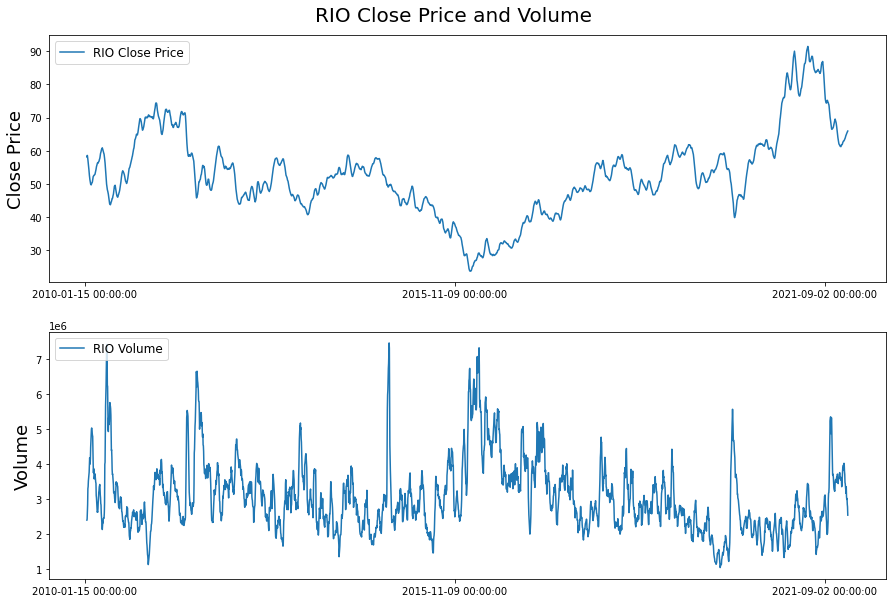

In [ ]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle(f"{stock} Close Price and Volume", fontsize=20)
st.set_y(0.92)

ax1 = fig.add_subplot(211)
ax1.plot(df['Close'], label=f'{stock} Close Price')
ax1.set_xticks(range(0, df.shape[0], 1464))
ax1.set_xticklabels(df['Date'].loc[::1464])
ax1.set_ylabel('Close Price', fontsize=18)
ax1.legend(loc="upper left", fontsize=12)

ax2 = fig.add_subplot(212)
ax2.plot(df['Volume'], label=f'{stock} Volume')
ax2.set_xticks(range(0, df.shape[0], 1464))
ax2.set_xticklabels(df['Date'].loc[::1464])
ax2.set_ylabel('Volume', fontsize=18)
ax2.legend(loc="upper left", fontsize=12)

In [ ]:
'''
df['Open'] = df['Open'].pct_change() # Create arithmetic returns column
df['High'] = df['High'].pct_change() # Create arithmetic returns column
df['Low'] = df['Low'].pct_change() # Create arithmetic returns column
df['Close'] = df['Close'].pct_change() # Create arithmetic returns column
df['Volume'] = df['Volume'].pct_change()
'''

df['Open'] = df['Open'].diff() # Create arithmetic returns column
df['High'] = df['High'].diff() # Create arithmetic returns column
df['Low'] = df['Low'].diff() # Create arithmetic returns column
df['Close'] = df['Close'].diff() # Create arithmetic returns column
df['Volume'] = df['Volume'].diff()




df.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values

###############################################################################
'''Create indexes to split dataset'''

times = sorted(df.index.values)
last_10pct = sorted(df.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(df.index.values)[-int(0.2*len(times))] # Last 20% of series

###############################################################################
'''Normalize price columns'''
#
min_return = min(df[(df.index < last_20pct)][['Open', 'High', 'Low', 'Close']].min(axis=0))
max_return = max(df[(df.index < last_20pct)][['Open', 'High', 'Low', 'Close']].max(axis=0))

# Min-max normalize price columns (0-1 range)
df['Open'] = (df['Open'] - min_return) / (max_return - min_return)
df['High'] = (df['High'] - min_return) / (max_return - min_return)
df['Low'] = (df['Low'] - min_return) / (max_return - min_return)
df['Close'] = (df['Close'] - min_return) / (max_return - min_return)

###############################################################################
'''Normalize volume column'''

min_volume = df[(df.index < last_20pct)]['Volume'].min(axis=0)
max_volume = df[(df.index < last_20pct)]['Volume'].max(axis=0)

# Min-max normalize volume columns (0-1 range)
df['Volume'] = (df['Volume'] - min_volume) / (max_volume - min_volume)

###############################################################################
'''Create training, validation and test split'''

df_train = df[(df.index < last_20pct)]  # Training data are 80% of total data
df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)]
df_test = df[(df.index >= last_10pct)]

# Remove date column
df_train.drop(columns=['Date'], inplace=True)
df_val.drop(columns=['Date'], inplace=True)
df_test.drop(columns=['Date'], inplace=True)

# Convert pandas columns into arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

df_train.head()

Training data shape: (2409, 5)
Validation data shape: (301, 5)
Test data shape: (301, 5)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Open,High,Low,Close,Volume
10,0.748009,0.778533,0.750581,0.776792,0.539814
11,0.659423,0.650133,0.641340,0.659174,0.583640
12,0.575896,0.545621,0.495189,0.467734,0.606416
13,0.432565,0.474453,0.445007,0.416058,0.670088
14,0.447329,0.449071,0.445919,0.420206,0.549275


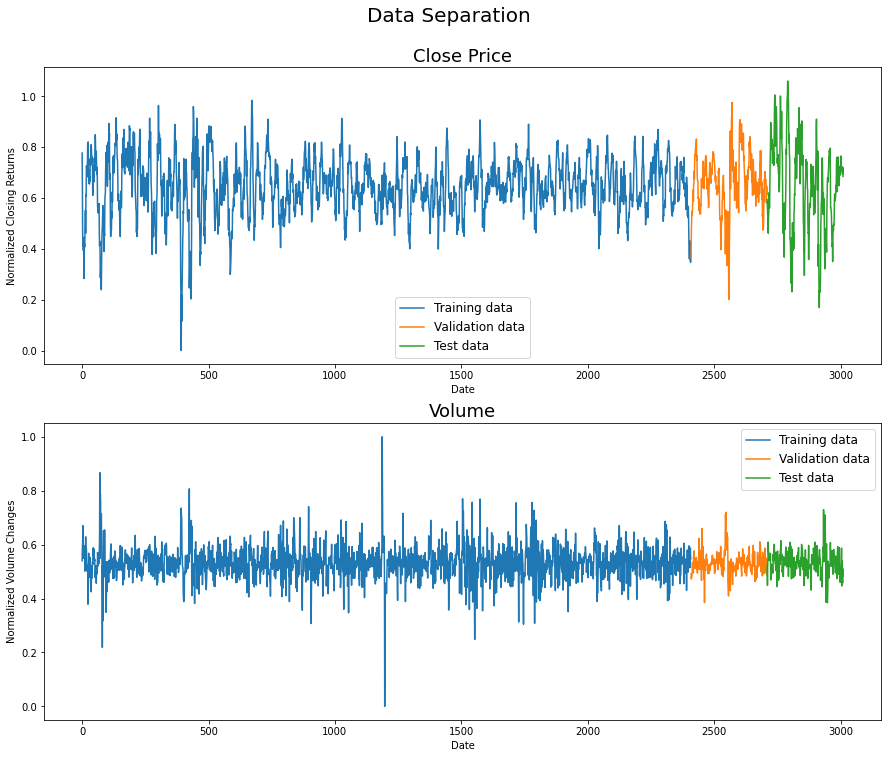

In [ ]:
fig = plt.figure(figsize=(15,12))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.95)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data.shape[0]), df_train['Close'], label='Training data')

ax1.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['Close'], label='Validation data')

ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Close'], label='Test data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Returns')
ax1.set_title("Close Price", fontsize=18)
ax1.legend(loc="best", fontsize=12)

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data.shape[0]), df_train['Volume'], label='Training data')

ax2.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['Volume'], label='Validation data')

ax2.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Volume'], label='Test data')
ax2.set_xlabel('Date')
ax2.set_ylabel('Normalized Volume Changes')
ax2.set_title("Volume", fontsize=18)
ax2.legend(loc="best", fontsize=12)

In [ ]:
# Training data
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
  y_train.append(train_data[:, 3][i]) #Value of 4th column (Close Price) of df-row 128+1
X_train, y_train = np.array(X_train), np.array(y_train)

###############################################################################

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 3][i])
X_val, y_val = np.array(X_val), np.array(y_val)

###############################################################################

# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 3][i])    
X_test, y_test = np.array(X_test), np.array(y_test)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(2401, 8, 5) (2401,)
(293, 8, 5) (293,)


In [11]:
def create_model():
  '''Initialize time and transformer layers'''
  time_embedding = Time2Vector(seq_len)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

  '''Construct model'''
  in_seq = Input(shape=(seq_len, 5))
  x = time_embedding(in_seq)
  x = Concatenate(axis=-1)([in_seq, x])
  x = attn_layer1((x, x, x))
  x = attn_layer2((x, x, x))
  x = attn_layer3((x, x, x))
  x = GlobalAveragePooling1D(data_format='channels_first')(x)
  x = Dropout(0.1)(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.1)(x)
  out = Dense(1, activation='linear')(x) # , activation='linear'

  model = Model(inputs=in_seq, outputs=out)
  model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mape'])
  return model


model = create_model()
model.summary()

callback = tf.keras.callbacks.ModelCheckpoint('Transformer+TimeEmbedding.hdf5', 
                                              monitor='val_loss', 
                                              save_best_only=True,
                                              verbose=1) 


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 5)]       0           []                               
                                                                                                  
 time2_vector (Time2Vector)     (None, 8, 2)         32          ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 8, 7)         0           ['input_1[0][0]',                
                                                                  'time2_vector[0][0]']           
                                                                                                  
 transformer_encoder (Transform  (None, 8, 7)        99114       ['concatenate[0][0]',        

In [ ]:
history = model.fit(X_train, y_train, 
                    batch_size=batch_size, # batch size 512
                    epochs=10, 
                    steps_per_epoch=70,
                    #callbacks=[callback],
                    validation_data=(X_val, y_val)) 

Epoch 1/10
70/70 [==============================] - 12s 170ms/step - loss: 0.0045 - mae: 0.0522 - mape: 183228.3750 - val_loss: 0.0050 - val_mae: 0.0563 - val_mape: 8.7215
Epoch 2/10
70/70 [==============================] - 10s 144ms/step - loss: 0.0049 - mae: 0.0535 - mape: 212080.4062 - val_loss: 0.0033 - val_mae: 0.0435 - val_mape: 7.1403
Epoch 3/10
70/70 [==============================] - 10s 143ms/step - loss: 0.0042 - mae: 0.0503 - mape: 187704.6250 - val_loss: 0.0031 - val_mae: 0.0422 - val_mape: 6.9519
Epoch 4/10
70/70 [==============================] - 10s 143ms/step - loss: 0.0044 - mae: 0.0510 - mape: 180281.3594 - val_loss: 0.0035 - val_mae: 0.0443 - val_mape: 7.1814
Epoch 5/10
70/70 [==============================] - 10s 145ms/step - loss: 0.0042 - mae: 0.0498 - mape: 174827.3750 - val_loss: 0.0031 - val_mae: 0.0418 - val_mape: 6.9324
Epoch 6/10
70/70 [==============================] - 10s 144ms/step - loss: 0.0039 - mae: 0.0488 - mape: 138051.6250 - val_loss: 0.0037 - val

In [ ]:
#Calculate predication for training, validation and test data
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

#Print evaluation metrics for all datasets
train_eval = model.evaluate(X_train, y_train, verbose=0)
val_eval = model.evaluate(X_val, y_val, verbose=0)
test_eval = model.evaluate(X_test, y_test, verbose=0)
print(' ')
print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(train_eval[0], train_eval[1], train_eval[2]))
print('Validation Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(val_eval[0], val_eval[1], val_eval[2]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval[0], test_eval[1], test_eval[2]))



 
Evaluation metrics
Training Data - Loss: 0.0028, MAE: 0.0396, MAPE: 134071.0000
Validation Data - Loss: 0.0035, MAE: 0.0443, MAPE: 7.3526
Test Data - Loss: 0.0060, MAE: 0.0599, MAPE: 10.6335


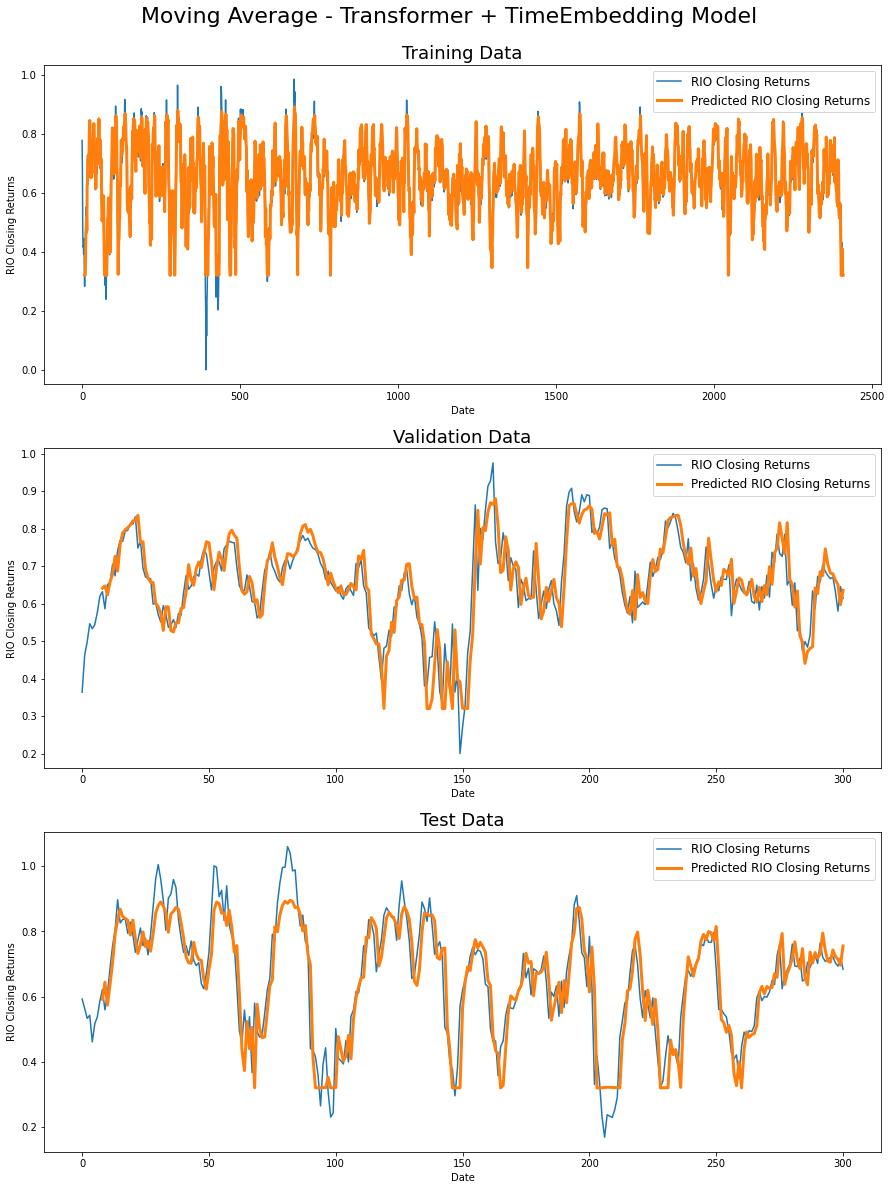

In [ ]:
fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Moving Average - Transformer + TimeEmbedding Model", fontsize=22)
st.set_y(0.92)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:, 3], label=f'{stock} Closing Returns')
ax11.plot(np.arange(seq_len, train_pred.shape[0]+seq_len), train_pred, linewidth=3, label=f'Predicted {stock} Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel(f'{stock} Closing Returns')
ax11.legend(loc="best", fontsize=12)

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:, 3], label=f'{stock} Closing Returns')
ax21.plot(np.arange(seq_len, val_pred.shape[0]+seq_len), val_pred, linewidth=3, label=f'Predicted {stock} Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel(f'{stock} Closing Returns')
ax21.legend(loc="best", fontsize=12)

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:, 3], label=f'{stock} Closing Returns')
ax31.plot(np.arange(seq_len, test_pred.shape[0]+seq_len), test_pred, linewidth=3, label=f'Predicted {stock} Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel(f'{stock} Closing Returns')
ax31.legend(loc="best", fontsize=12)

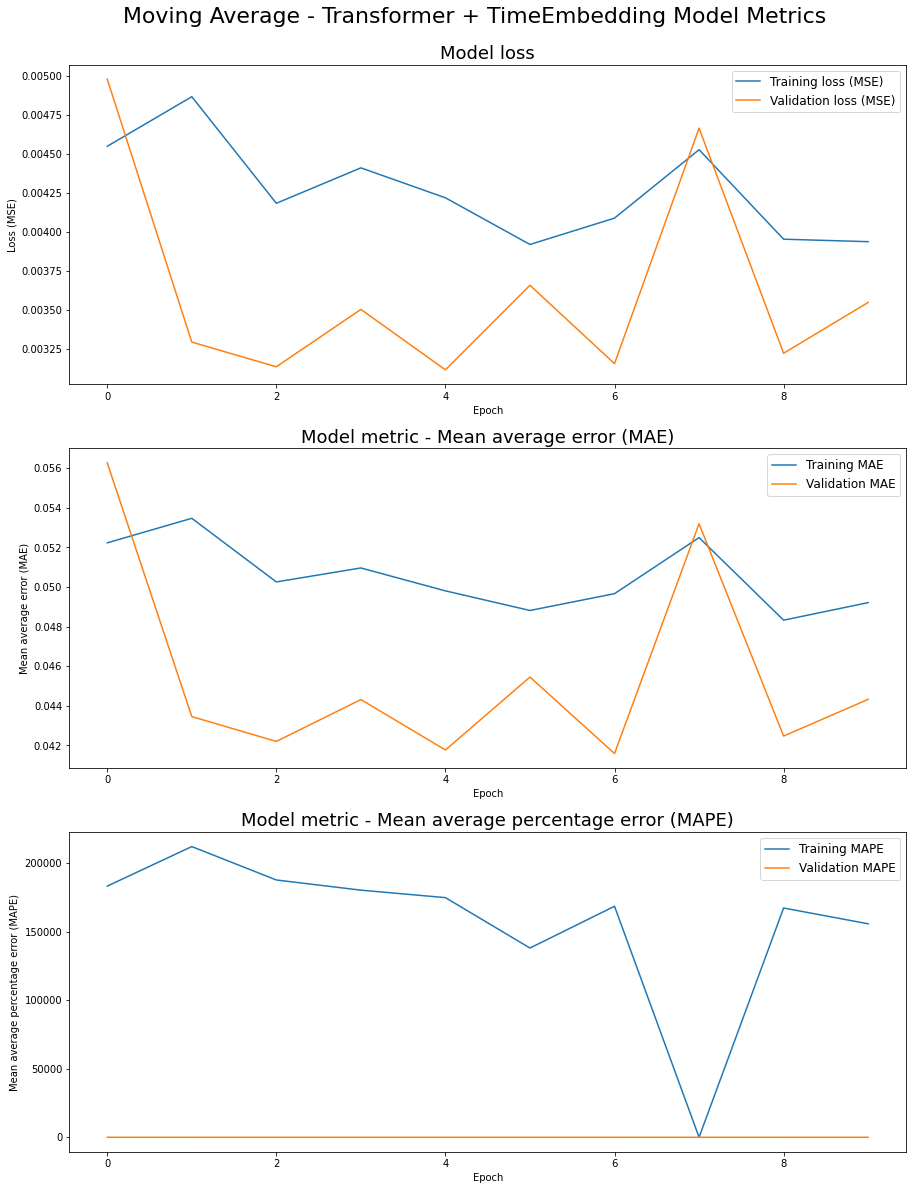

In [ ]:
fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Moving Average - Transformer + TimeEmbedding Model Metrics", fontsize=22)
st.set_y(0.92)

#Plot model loss
ax1 = fig.add_subplot(311)
ax1.plot(history.history['loss'], label='Training loss (MSE)')
ax1.plot(history.history['val_loss'], label='Validation loss (MSE)')
ax1.set_title("Model loss", fontsize=18)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss (MSE)')
ax1.legend(loc="best", fontsize=12)

#Plot MAE
ax2 = fig.add_subplot(312)
ax2.plot(history.history['mae'], label='Training MAE')
ax2.plot(history.history['val_mae'], label='Validation MAE')
ax2.set_title("Model metric - Mean average error (MAE)", fontsize=18)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Mean average error (MAE)')
ax2.legend(loc="best", fontsize=12)

#Plot MAPE
ax3 = fig.add_subplot(313)
ax3.plot(history.history['mape'], label='Training MAPE')
ax3.plot(history.history['val_mape'], label='Validation MAPE')
ax3.set_title("Model metric - Mean average percentage error (MAPE)", fontsize=18)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Mean average percentage error (MAPE)')
ax3.legend(loc="best", fontsize=12)

# calcolo profitti

In [26]:
def create_model():
  '''Initialize time and transformer layers'''
  time_embedding = Time2Vector(seq_len)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

  '''Construct model'''
  in_seq = Input(shape=(seq_len, 5))
  x = time_embedding(in_seq)
  x = Concatenate(axis=-1)([in_seq, x])
  x = attn_layer1((x, x, x))
  x = attn_layer2((x, x, x))
  x = attn_layer3((x, x, x))
  x = GlobalAveragePooling1D(data_format='channels_first')(x)
  x = Dropout(0.1)(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.1)(x)
  out = Dense(1, activation='linear')(x) # , activation='linear'

  model = Model(inputs=in_seq, outputs=out)
  model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mape'])
  return model

In [ ]:
# dataframe originale
df_original = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_original_test = df_original[(df_original.reset_index().index >= last_10pct)]

In [ ]:
df_original_test = df_original_test[8:]

In [ ]:
df_original_test.drop(columns='Adj Close', inplace=True)

In [ ]:
df_original_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-03,59.410000,59.410000,58.720001,58.820000,2032100
2020-11-04,57.490002,57.900002,56.970001,57.599998,2445500
2020-11-05,58.910000,59.619999,58.720001,58.779999,1827200
2020-11-06,60.549999,61.200001,60.099998,60.830002,2086100
2020-11-09,63.110001,63.209999,60.240002,61.560001,3005600


In [ ]:
df_concat = pd.concat([df_original_test.reset_index(drop=True) ,pd.DataFrame(test_data, columns=df_original_test.columns+'_normalized')[8:].reset_index(drop=True)], axis=1)

In [ ]:
df_concat['pred'] = test_pred

In [ ]:
df_concat.head()

,Open,High,Low,Close,Volume,Open_normalized,High_normalized,Low_normalized,Close_normalized,Volume_normalized,pred
0,59.410000,59.410000,58.720001,58.820000,2032100,0.652621,0.629064,0.631719,0.621433,0.552008,0.638058
1,57.490002,57.900002,56.970001,57.599998,2445500,0.573325,0.543464,0.556735,0.559721,0.545995,0.699707
2,58.910000,59.619999,58.720001,58.779999,1827200,0.617784,0.630391,0.635037,0.609489,0.553498,0.652866
3,60.549999,61.200001,60.099998,60.830002,2086100,0.675183,0.685468,0.669210,0.687459,0.555319,0.702204
4,63.110001,63.209999,60.240002,61.560001,3005600,0.783013,0.785667,0.723623,0.755475,0.567932,0.776707


In [ ]:
df_concat['operation'] = np.where(df_concat['Open_normalized'] < df_concat['pred'], 1, 0)

In [ ]:
tot, stats = calculate_investment(df_concat,initial_investment=df_concat.Open.iloc[0])

In [ ]:
tot

66.28703721829373

In [ ]:
pd.DataFrame(stats)

,cash invested,Buy at,Close at,n stock buyed,Bot decision,cash returned
0,59.410000,59.410000,58.820000,1.010031,0,60.005918
1,60.005918,57.490002,57.599998,1.043763,1,60.120729
2,60.120729,58.910000,58.779999,1.020552,1,59.988056
3,59.988056,60.549999,60.830002,0.986159,0,59.711929
4,59.711929,63.110001,61.560001,0.969979,0,61.215396
...,...,...,...,...,...,...
288,81.073558,66.029999,66.410004,1.227829,1,81.540139
289,81.540139,66.180000,65.919998,1.232096,1,81.219791
290,81.219791,66.000000,66.120003,1.230603,1,81.367467
291,81.367467,67.199997,66.769997,1.218623,0,81.891476


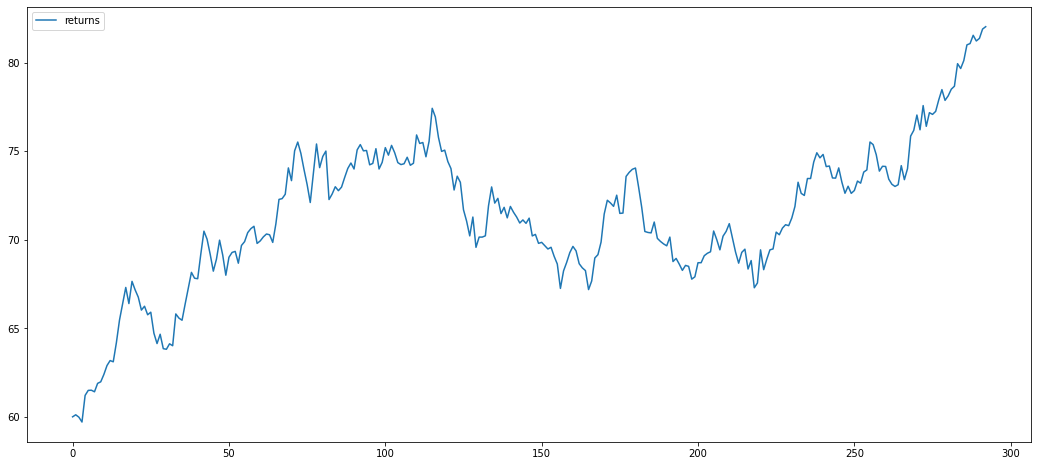

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(pd.DataFrame(stats)['cash returned'], label='returns')
plt.legend()

In [27]:
def test_tickers_on_transformer(stock_list, epochs=50):

  diz = {}
  diz['stock'] = []
  diz['MSE'] = []
  diz['MAE'] = []
  diz['gain'] = []
  diz['initial_investment'] = []
  diz['ROI'] = []

  for stock in stock_list:
    df = yf.download(stock, start, end)
    df = df.reset_index()
    df.drop(columns='Adj Close', inplace=True)

    # Replace 0 to avoid dividing by 0 later on
    df['Volume'].replace(to_replace=0, method='ffill', inplace=True) 
    df.sort_values('Date', inplace=True)

    # Apply moving average with a window of 10 days to all columns
    df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].rolling(10).mean() 

    # Drop all rows with NaN values
    df.dropna(how='any', axis=0, inplace=True)


    df['Open'] = df['Open'].diff() # Create arithmetic returns column
    df['High'] = df['High'].diff() # Create arithmetic returns column
    df['Low'] = df['Low'].diff() # Create arithmetic returns column
    df['Close'] = df['Close'].diff() # Create arithmetic returns column
    df['Volume'] = df['Volume'].diff()




    df.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values

    ###############################################################################
    '''Create indexes to split dataset'''

    times = sorted(df.index.values)
    last_10pct = sorted(df.index.values)[-int(0.1*len(times))] # Last 10% of series
    last_20pct = sorted(df.index.values)[-int(0.2*len(times))] # Last 20% of series

    ###############################################################################
    '''Normalize price columns'''
    #
    min_return = min(df[(df.index < last_20pct)][['Open', 'High', 'Low', 'Close']].min(axis=0))
    max_return = max(df[(df.index < last_20pct)][['Open', 'High', 'Low', 'Close']].max(axis=0))

    # Min-max normalize price columns (0-1 range)
    df['Open'] = (df['Open'] - min_return) / (max_return - min_return)
    df['High'] = (df['High'] - min_return) / (max_return - min_return)
    df['Low'] = (df['Low'] - min_return) / (max_return - min_return)
    df['Close'] = (df['Close'] - min_return) / (max_return - min_return)

    ###############################################################################
    '''Normalize volume column'''

    min_volume = df[(df.index < last_20pct)]['Volume'].min(axis=0)
    max_volume = df[(df.index < last_20pct)]['Volume'].max(axis=0)

    # Min-max normalize volume columns (0-1 range)
    df['Volume'] = (df['Volume'] - min_volume) / (max_volume - min_volume)

    ###############################################################################
    '''Create training, validation and test split'''

    df_train = df[(df.index < last_20pct)]  # Training data are 80% of total data
    df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)]
    df_test = df[(df.index >= last_10pct)]

    # Remove date column
    df_train.drop(columns=['Date'], inplace=True)
    df_val.drop(columns=['Date'], inplace=True)
    df_test.drop(columns=['Date'], inplace=True)

    # Convert pandas columns into arrays
    train_data = df_train.values
    val_data = df_val.values
    test_data = df_test.values


    # Training data
    X_train, y_train = [], []
    for i in range(seq_len, len(train_data)):
      X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
      y_train.append(train_data[:, 3][i]) #Value of 4th column (Close Price) of df-row 128+1
    X_train, y_train = np.array(X_train), np.array(y_train)

    ###############################################################################

    # Validation data
    X_val, y_val = [], []
    for i in range(seq_len, len(val_data)):
        X_val.append(val_data[i-seq_len:i])
        y_val.append(val_data[:, 3][i])
    X_val, y_val = np.array(X_val), np.array(y_val)

    ###############################################################################

    # Test data
    X_test, y_test = [], []
    for i in range(seq_len, len(test_data)):
        X_test.append(test_data[i-seq_len:i])
        y_test.append(test_data[:, 3][i])    
    X_test, y_test = np.array(X_test), np.array(y_test)

    # creo il modello
    model = create_model()
    history = model.fit(X_train, y_train, 
                    batch_size=batch_size, # batch size 512
                    epochs=epochs, 
                    steps_per_epoch=70,
                    #callbacks=[callback],
                    validation_data=(X_val, y_val)) 

    #Calculate predication for training, validation and test data
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)

    #Print evaluation metrics for all datasets
    train_eval = model.evaluate(X_train, y_train, verbose=0)
    val_eval = model.evaluate(X_val, y_val, verbose=0)
    test_eval = model.evaluate(X_test, y_test, verbose=0)

    ###########################################
    # CALCOLO PROFITTI
    df_original = yf.download(stock, start, end)
    df_original_test = df_original[(df_original.reset_index().index >= last_10pct)]
    df_original_test = df_original_test[8:]
    df_original_test.drop(columns='Adj Close', inplace=True)

    df_concat = pd.concat([df_original_test.reset_index(drop=True) ,pd.DataFrame(test_data, columns=df_original_test.columns+'_normalized')[8:].reset_index(drop=True)], axis=1)
    df_concat['pred'] = test_pred
    df_concat['operation'] = np.where(df_concat['Open_normalized'] < df_concat['pred'], 1, 0)

    initial_investment = df_concat.Open.iloc[0]
    tot, stats = calculate_investment(df_concat,initial_investment=initial_investment)

    roi = (tot-initial_investment)/initial_investment

    # riempio il dizionario
    diz['stock'].append(stock)
    diz['MSE'].append(history.history['val_loss'])
    diz['MAE'].append(history.history['val_mae'])
    diz['initial_investment'].append(initial_investment)
    diz['gain'].append(tot)
    diz['ROI'].append(roi)

  return diz


In [ ]:
# testo con 50 step
df_all_stocks = test_tickers_on_transformer(stock_list, epochs=100)

In [ ]:
pd.DataFrame(df_all_stocks) # su 50 epoche

,stock,MSE,MAE,gain,ROI
0,^GSPC,"[0.054661013185977936, 0.05321647971868515, 0....","[0.1502251774072647, 0.14429807662963867, 0.13...",2827.733189,-0.152422
1,^FTSE,"[0.030134305357933044, 0.025260088965296745, 0...","[0.11557181924581528, 0.10014010965824127, 0.0...",7783.986415,0.395655
2,^GDAXI,"[0.03828395903110504, 0.045884549617767334, 0....","[0.12524734437465668, 0.14561541378498077, 0.1...",12790.000844,0.078523
3,^NSEI,"[0.09805779904127121, 0.09249041229486465, 0.0...","[0.19256292283535004, 0.18706414103507996, 0.1...",10986.490980,-0.096257


In [ ]:
pd.DataFrame(df_all_stocks) # su 100 epoche

,stock,MSE,MAE,gain,ROI
0,^GSPC,"[0.07123209536075592, 0.05978625267744064, 0.0...","[0.18155135214328766, 0.1580420285463333, 0.15...",2527.644977,-0.242369
1,^FTSE,"[0.025244595482945442, 0.02826758101582527, 0....","[0.1023237407207489, 0.10326990485191345, 0.10...",7509.638499,0.346465
2,^GDAXI,"[0.05158178135752678, 0.04374676197767258, 0.0...","[0.15805009007453918, 0.1306138038635254, 0.12...",11672.297076,-0.015728
3,^NSEI,"[0.09620042890310287, 0.08885055780410767, 0.0...","[0.19096173346042633, 0.17936010658740997, 0.1...",12061.347840,-0.007840


In [28]:
dict_stocks, _ = get_categorical_tickers()

In [ ]:
dict_stocks.pop('all')

In [30]:
list_complete = []
for key in dict_stocks.keys():
  list_complete += dict_stocks[key][:2]

In [ ]:
list_complete

In [31]:
df_all_stocks = test_tickers_on_transformer(list_complete)

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/50
70/70 [==============================] - 52s 289ms/step - loss: 0.1481 - mae: 0.3078 - mape: 46.9861 - val_loss: 0.0226 - val_mae: 0.1054 - val_mape: 32.8651
Epoch 2/50
70/70 [==============================] - 12s 166ms/step - loss: 0.0116 - mae: 0.0846 - mape: 14.3785 - val_loss: 0.0167 - val_mae: 0.0877 - val_mape: 27.7619
Epoch 3/50
70/70 [==============================] - 11s 158ms/step - loss: 0.0107 - mae: 0.0807 - mape: 13.9245 - val_loss: 0.0163 - val_mae: 0.0878 - val_mape: 27.5974
Epoch 4/50
70/70 [==============================] - 11s 160ms/step - loss: 0.0090 - mae: 0.0733 - mape: 12.6141 - val_loss: 0.0147 - val_mae: 0.0918 - val_mape: 26.8920
Epoch 5/50
70/70 [==============================] - 11s 161ms/step - loss: 0.0081 - mae: 0.0694 - mape: 11.7607 - val_loss: 0.0114 - val_mae: 0.0695 - val_mape: 23.2865
Epoch 6/50
70/70 [==============================] - 11s 162ms/step - loss: 0.0070 - mae: 0.0647 - mape: 10.9926 - val_loss: 0.0128 - val_mae: 0.0809 - val_

In [32]:
df_complete = pd.DataFrame(df_all_stocks).sort_values(by='ROI', ascending=False)

In [33]:
df_complete.head(15)

,stock,MSE,MAE,gain,initial_investment,ROI
12,AMZN,"[0.061116091907024384, 0.05408335477113724, 0....","[0.18023325502872467, 0.16843914985656738, 0.1...",180.599570,150.926498,0.196606
19,DIS,"[0.03697668015956879, 0.03143563121557236, 0.0...","[0.1349191665649414, 0.12678775191307068, 0.11...",144.891218,121.610001,0.191442
10,BRK-A,"[0.044947221875190735, 0.040487587451934814, 0...","[0.14996488392353058, 0.14449907839298248, 0.1...",363835.182096,312300.000000,0.165018
14,WMT,"[0.03202630952000618, 0.02677571401000023, 0.0...","[0.1273367553949356, 0.11455629765987396, 0.11...",163.998258,141.649994,0.157771
0,XOM,"[0.02262909896671772, 0.01670587621629238, 0.0...","[0.10538150370121002, 0.08774048835039139, 0.0...",38.815464,34.490002,0.125412
8,UNH,"[0.08143443614244461, 0.0801675096154213, 0.07...","[0.20615513622760773, 0.20556502044200897, 0.2...",345.184260,317.470001,0.087297
3,LIN,"[0.06220586970448494, 0.0624941922724247, 0.05...","[0.17942315340042114, 0.18068398535251617, 0.1...",248.319640,232.639999,0.067399
15,PG,"[0.01008589193224907, 0.00988462008535862, 0.0...","[0.07428175210952759, 0.07361899316310883, 0.0...",147.819507,139.320007,0.061007
11,V,"[0.08077726513147354, 0.08218944072723389, 0.0...","[0.19701136648654938, 0.19727523624897003, 0.1...",195.615036,186.830002,0.047022
2,BHP,"[0.00953823234885931, 0.005337333772331476, 0....","[0.06932327896356583, 0.055626846849918365, 0....",42.853894,44.264050,-0.031858


In [ ]:
df_complete.to_csv('df_complete.csv')

In [ ]:
df_complete = pd.read_csv('df_complete.csv')

In [ ]:
df_complete.head(10)

,Unnamed: 0,stock,MSE,MAE,gain,ROI
0,5,RIO,"[0.008062135428190231, 0.007880432531237602, 0...","[0.06902465969324112, 0.06870835274457932, 0.0...",75.812416,0.276088
1,21,WMT,"[0.027483630925416946, 0.025269698351621628, 0...","[0.11518318206071854, 0.11123886704444885, 0.1...",169.076782,0.193624
2,29,VZ,"[0.012153368443250656, 0.010596111416816711, 0...","[0.08055684715509415, 0.07464396208524704, 0.0...",64.069844,0.108283
3,11,NGG,"[0.039169348776340485, 0.03319094702601433, 0....","[0.14173325896263123, 0.13175177574157715, 0.1...",65.696598,0.079294
4,28,DIS,"[0.03679478168487549, 0.026327213272452354, 0....","[0.13437704741954803, 0.1174493208527565, 0.11...",128.774047,0.058910
5,26,TSM,"[0.11373617500066757, 0.10561595857143402, 0.1...","[0.23166507482528687, 0.22199147939682007, 0.2...",91.235357,0.058538
6,18,AMZN,"[0.057535719126462936, 0.05102314427495003, 0....","[0.17372891306877136, 0.16319696605205536, 0.1...",159.223164,0.054972
7,22,PG,"[0.01028476282954216, 0.010365022346377373, 0....","[0.07439158111810684, 0.07450786232948303, 0.0...",146.693567,0.052925
8,7,HON,"[0.10170686990022659, 0.09387946128845215, 0.0...","[0.21407370269298553, 0.20437660813331604, 0.1...",184.262175,0.049747
9,10,DUK,"[0.09639552980661392, 0.08704370260238647, 0.0...","[0.20284363627433777, 0.18276800215244293, 0.1...",95.837596,0.010306


In [ ]:
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
int(len(df) * 0.1) - 8

294

In [ ]:
df.iloc[-294:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000
2020-11-03,3336.250000,3389.489990,3336.250000,3369.159912,3369.159912,4220070000
2020-11-04,3406.459961,3486.250000,3405.169922,3443.439941,3443.439941,4783040000
2020-11-05,3485.739990,3529.050049,3485.739990,3510.449951,3510.449951,4841190000
2020-11-06,3508.340088,3521.580078,3484.340088,3509.439941,3509.439941,4833950000
...,...,...,...,...,...,...
2021-12-27,4733.990234,4791.490234,4733.990234,4791.189941,4791.189941,2264120000
2021-12-28,4795.490234,4807.020020,4780.040039,4786.350098,4786.350098,2217050000
2021-12-29,4788.640137,4804.060059,4778.080078,4793.060059,4793.060059,2369370000


In [ ]:
df_rio = yf.download('RIO', start, end)

[*********************100%***********************]  1 of 1 completed


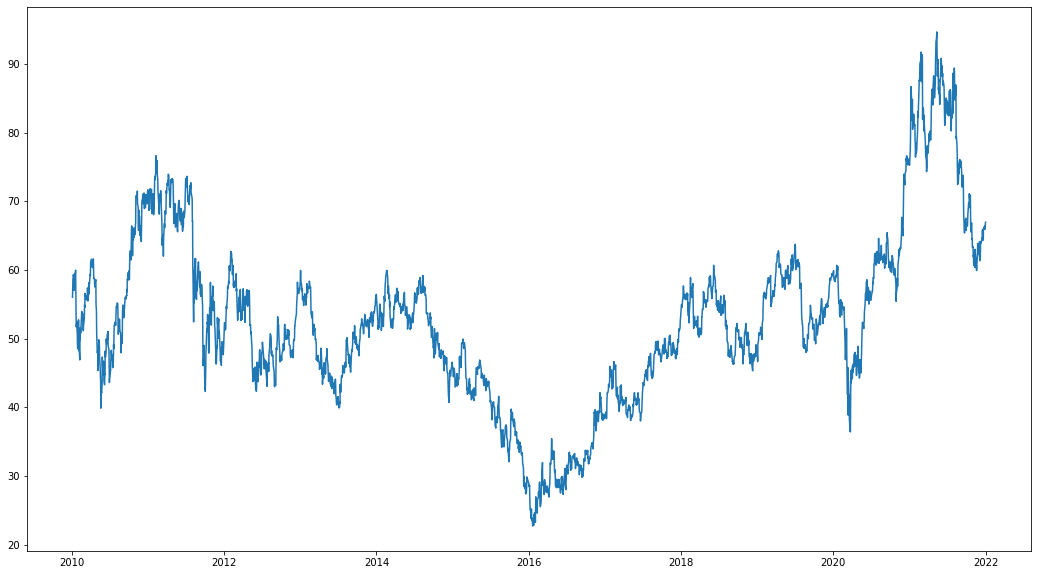

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(df_rio.Close)

In [ ]:
df_amzn = yf.download('AMZN', start, end)

[*********************100%***********************]  1 of 1 completed


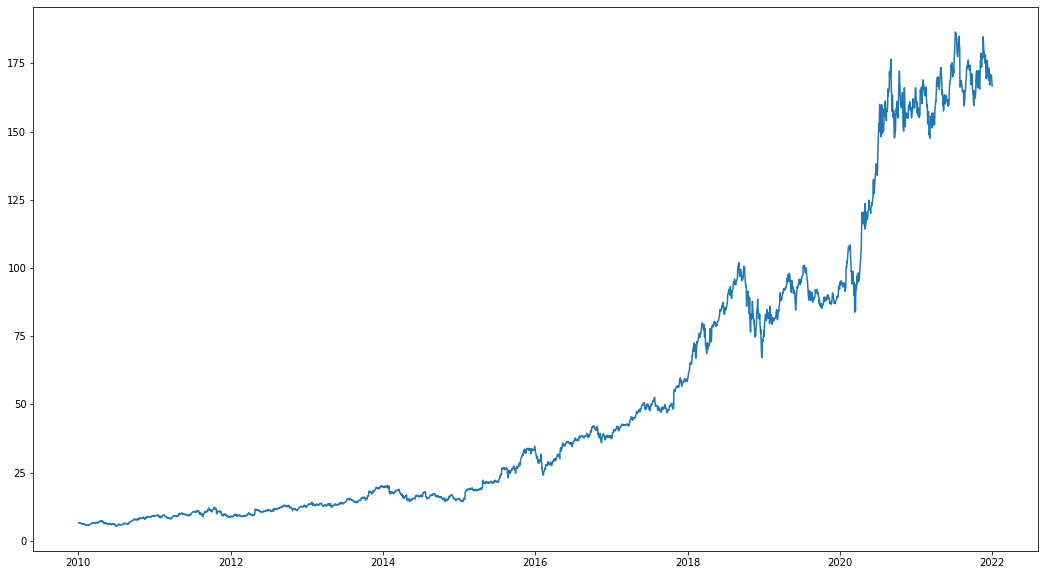

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(df_amzn.Close)

[*********************100%***********************]  1 of 1 completed


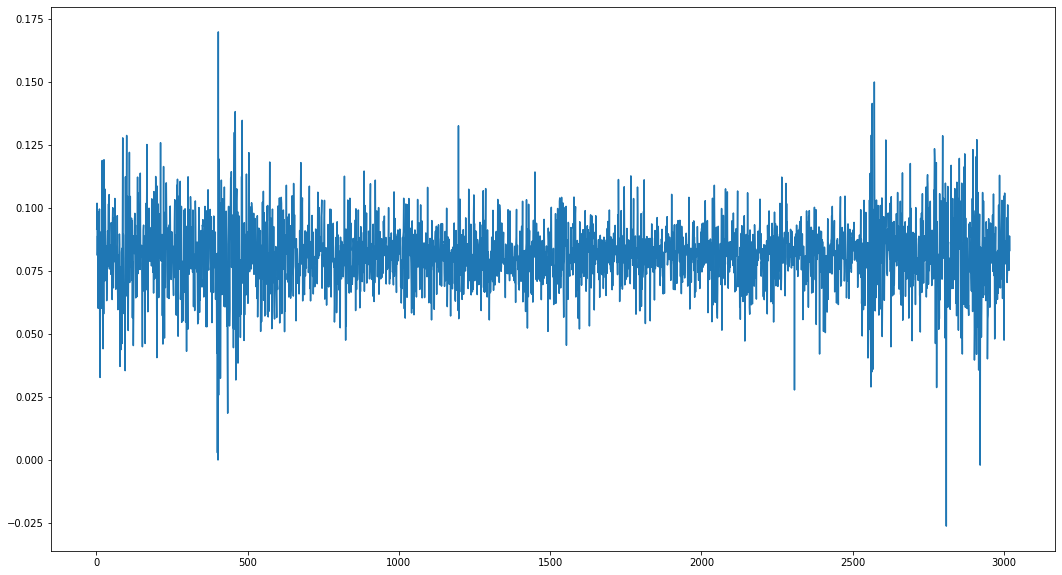

In [ ]:
stock='RIO'

df = yf.download(stock, start, end)

df = df.reset_index()

df['Close'] = df['Close'].diff()
df.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values

times = sorted(df.index.values)
last_10pct = sorted(df.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(df.index.values)[-int(0.2*len(times))] # Last 20% of series


min_return = min(df[(df.index < last_20pct)][['Open', 'High', 'Low', 'Close']].min(axis=0))
max_return = max(df[(df.index < last_20pct)][['Open', 'High', 'Low', 'Close']].max(axis=0))

df['Close'] = (df['Close'] - min_return) / (max_return - min_return)

plt.figure(figsize=(18,10))
plt.plot(df['Close'])

[*********************100%***********************]  1 of 1 completed


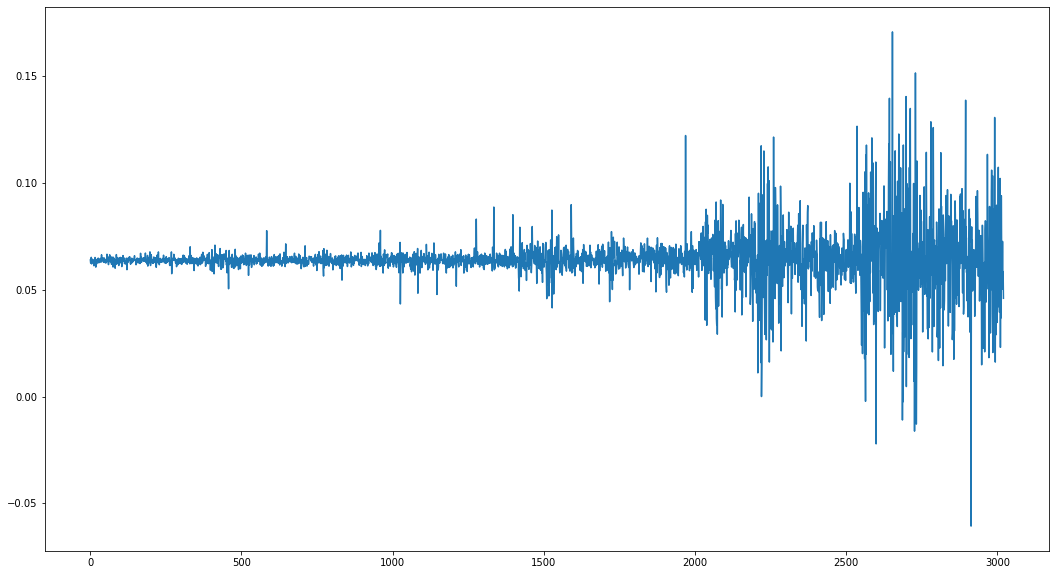

In [ ]:
stock='AMZN'

df = yf.download(stock, start, end)

df = df.reset_index()

df['Close'] = df['Close'].diff()
df.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values

times = sorted(df.index.values)
last_10pct = sorted(df.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(df.index.values)[-int(0.2*len(times))] # Last 20% of series


min_return = min(df[(df.index < last_20pct)][['Open', 'High', 'Low', 'Close']].min(axis=0))
max_return = max(df[(df.index < last_20pct)][['Open', 'High', 'Low', 'Close']].max(axis=0))

df['Close'] = (df['Close'] - min_return) / (max_return - min_return)

plt.figure(figsize=(18,10))
plt.plot(df['Close'])

In [ ]:
list(df_complete['stock'].values)[:10]

['RIO', 'WMT', 'VZ', 'NGG', 'DIS', 'TSM', 'AMZN', 'PG', 'HON', 'DUK']

In [ ]:
stock_list_10 = list(df_complete['stock'].values)[:10]

In [13]:
stock_list_10 = ['RIO', 'WMT', 'VZ', 'NGG', 'DIS', 'TSM', 'AMZN', 'PG', 'HON', 'DUK']

In [16]:
df_top_10 = test_tickers_on_transformer(stock_list_10, epochs=50)

[*********************100%***********************]  1 of 1 completed
Epoch 1/50
70/70 [==============================] - 46s 232ms/step - loss: 0.1459 - mae: 0.3077 - mape: 42328.8203 - val_loss: 0.0074 - val_mae: 0.0667 - val_mape: 10.9568
Epoch 2/50
70/70 [==============================] - 10s 148ms/step - loss: 0.0118 - mae: 0.0854 - mape: 265461.7500 - val_loss: 0.0070 - val_mae: 0.0645 - val_mape: 10.6719
Epoch 3/50
70/70 [==============================] - 13s 190ms/step - loss: 0.0111 - mae: 0.0826 - mape: 246502.0469 - val_loss: 0.0069 - val_mae: 0.0621 - val_mape: 9.8108
Epoch 4/50
70/70 [==============================] - 10s 147ms/step - loss: 0.0096 - mae: 0.0774 - mape: 247610.9375 - val_loss: 0.0063 - val_mae: 0.0606 - val_mape: 10.3407
Epoch 5/50
70/70 [==============================] - 10s 149ms/step - loss: 0.0089 - mae: 0.0737 - mape: 249058.8750 - val_loss: 0.0081 - val_mae: 0.0738 - val_mape: 12.4483
Epoch 6/50
70/70 [==============================] - 10s 149ms/step -

In [17]:
pd.DataFrame(df_top_10)

,stock,MSE,MAE,gain,initial_investment,ROI
0,RIO,"[0.0073744161054492, 0.0070037744008004665, 0....","[0.0666562020778656, 0.06450846791267395, 0.06...",77.657770,59.410000,0.307150
1,WMT,"[0.02580317109823227, 0.02419903501868248, 0.0...","[0.11393878608942032, 0.10923213511705399, 0.1...",188.641337,141.649994,0.331743
2,VZ,"[0.014901711605489254, 0.01062348298728466, 0....","[0.09188411384820938, 0.07484881579875946, 0.0...",64.535525,57.810001,0.116338
3,NGG,"[0.041260067373514175, 0.03422348573803902, 0....","[0.14053751528263092, 0.1316750943660736, 0.12...",52.551513,60.869999,-0.136660
4,DIS,"[0.03438107296824455, 0.02539239637553692, 0.0...","[0.12867680191993713, 0.11472243815660477, 0.1...",121.588124,121.610001,-0.000180
5,TSM,"[0.1321088820695877, 0.11320988833904266, 0.10...","[0.2546417713165283, 0.23073960840702057, 0.22...",101.963149,86.190002,0.183004
6,AMZN,"[0.06255508214235306, 0.05993581935763359, 0.0...","[0.1841527223587036, 0.17944644391536713, 0.15...",156.215029,150.926498,0.035040
7,PG,"[0.010296391323208809, 0.011034621857106686, 0...","[0.07460711896419525, 0.07891286164522171, 0.0...",124.623373,139.320007,-0.105488
8,HON,"[0.09953011572360992, 0.09650804102420807, 0.0...","[0.2151765525341034, 0.2090030014514923, 0.202...",168.112862,175.529999,-0.042256
9,DUK,"[0.10395299643278122, 0.08968161046504974, 0.0...","[0.20751820504665375, 0.1874191164970398, 0.18...",69.206633,94.860001,-0.270434
